In [133]:
import numpy as np
import matplotlib.pylab as plt

In [134]:
DARK_CURRENT = 0.15 #e/p/s
READ_NOISE = 9.3 #e

In [168]:
data = {
    "star1":{
        "filter_type" : 'g_prime',
        "exposure_time": [1,5,10,15,20,25,30,45,60,90,120,150,180,210,240,270,300,360,420,480,540,600,900], #s
        "n_pixel":       [48,50,51,49,51,49,51,49,47,50,51,51,51,51,52,49,50,49,50,51,51,50,51],
        "S_source":     [1048.56,1029.44,1021.45,1024.24,1025.02,1031.76,1033.41,1071.39,1115.98,1202.88,1281.69,1376.14,1447.43,1561.57,1677.06,1776.16,1871.94,2087.16,2293.72,2501.61,2738.27,2972.58,4131.47], #ADU
        "n_pixel_Sky":  [247,253,252,253,248,249,252,248,253,252,253,256,250,256,252,254,252,248,248,253,252,250,254],
        "S_sky":        [1045.97,1024.15,1011.88,1010.27,1010.13,1010.59,1011.85,1027.23,1050.78,1111.21,1175.32,1244.48,1316.4,1388.11,1460.2,1533.23,1608,1762.29,1920.66,2088.13,2282.03,2474.66,3378.65] #ADU
    },
    "star2":{
        "filter_type" : 'i_prime',
        "exposure_time": [1,5,10,15,20,25,30,45,60,90,120,150,180,210,240,270,300,360,420,480,540,600,900], #s
        "n_pixel":       [51,51,49,52,49,51,50,51,50,46,49,49,52,51,51,50,51,51,50,50,51,51,49],
        "S_source":     [1050.71,1082.18,1094.45,1121.67,1136.39,1162.82,1190.64,1261.08,1328.34,1451.43,1579.9,1678.8,1813.08,1926.29,2086.78,2192.04,2315.45,2595.76,2882.32,3137.96,3453.57,3781.65,5372.63], #ADU
        "n_pixel_Sky":  [247,250,252,253,246,251,251,252,252,254,253,247,254,254,247,251,251,253,253,255,252,252,247],
        "S_sky":        [1041.84,1074.2,1087.99,1111.01,1122.93,1148.8,1175.76,1225.5,1272.69,1370.15,1468.58,1564.19,1674.5,1768.96,1888.7,1962.2,2069.22,2295.76,2537.84,2744.87,3018.46,3291.41,4640.91] #ADU
    },
        "star3":{
        "filter_type" : 'r_prime',
        "exposure_time": [1,5,10,15,20,25,30,45,60,90,120,150,180,210,240,270,300,360,420,480,540,600,900], #s
        "n_pixel":       [50,51,49,47,52,49,49,49,50,50,49,47,49,47,51,49,51,50,52,51,50,49,52],
        "S_source":     [1049.22,1087.25,1119.49,1162.87,1170.33,1192.24,1221.02,1306.84,1383.56,1583.54,1785.45,1955.02,2158.27,2382.72,2552.69,2759.71,2984.45,3400.16,3844.87,4307.43,4831.06,5358.55,7731.56], #ADU
        "n_pixel_Sky":  [251,252,251,248,253,246,250,251,247,253,253,252,248,254,252,252,254,249,250,251,246,252,246],
        "S_sky":        [1046.57,1075.61,1105.84,1126.68,1144.81,1159.22,1171.62,1225.01,1296.49,1428.23,1567.19,1721.56,1868.95,2028.8,2181.78,2333.27,2503.11,2860.53,3180,3550.07,3957.58,4412.73,6426.87] #ADU
    }
}

In [169]:
class Star:
    def __init__(self,  filter_type=None, exposure_time=None, n_pixel=None, S_source=None, n_pixel_sky=None, S_sky=None):
        self.exposure_time = exposure_time
        self.n_pixel = n_pixel 
        self.S_source = S_source
        self.n_pixel_sky = n_pixel_sky
        self.S_sky = S_sky
        self.name = ""
        self.filter_type = filter_type

    def SNR(self):
        return self.S_source/np.sqrt(self.S_source + self.n_pixel*(1+(self.n_pixel/self.n_pixel_sky))*(self.S_sky + self.exposure_time*DARK_CURRENT + READ_NOISE**2))


class StarData():
    def __init__(self, name=""):
        self.name = name
        self.starInTime = []
        self.star = Star()

    def load(self, data):
        star_data =  data.get(self.name)
        for exposure_time, filter_type, n_pixel, S_source, n_pixel_sky, S_sky in zip(star_data["exposure_time"], 
                                                                        star_data["filter_type"],
                                                                        star_data["n_pixel"], 
                                                                        star_data["S_source"], 
                                                                        star_data["n_pixel_Sky"], 
                                                                        star_data["S_sky"]):
            self.star = Star(exposure_time, filter_type, n_pixel, S_source, n_pixel_sky, S_sky)
            self.starInTime.append(self.star)

In [170]:
SNR_dict = {}
for star_name in data.keys():
    starData = StarData(star_name)
    starData.load(data)
    list_of_snr = [ star.SNR() for star in  starData.starInTime]
    SNR_dict[star_name] = list_of_snr

TypeError: can't multiply sequence by non-int of type 'float'

In [145]:
SNR = np.mean((SNR_dict["star1"],SNR_dict["star2"],SNR_dict["star3"]), axis=0)

KeyError: 'star1'

In [109]:
SNR

array([ 4.01138729,  4.0075756 ,  4.08097178,  4.16373572,  4.10410344,
        4.19292742,  4.22756924,  4.40302398,  4.57432659,  4.90268886,
        5.12085772,  5.37188767,  5.49634605,  5.84837283,  5.9636936 ,
        6.33131948,  6.45220061,  6.92820757,  7.29915436,  7.69679456,
        8.11719685,  8.58362574, 10.17245907])

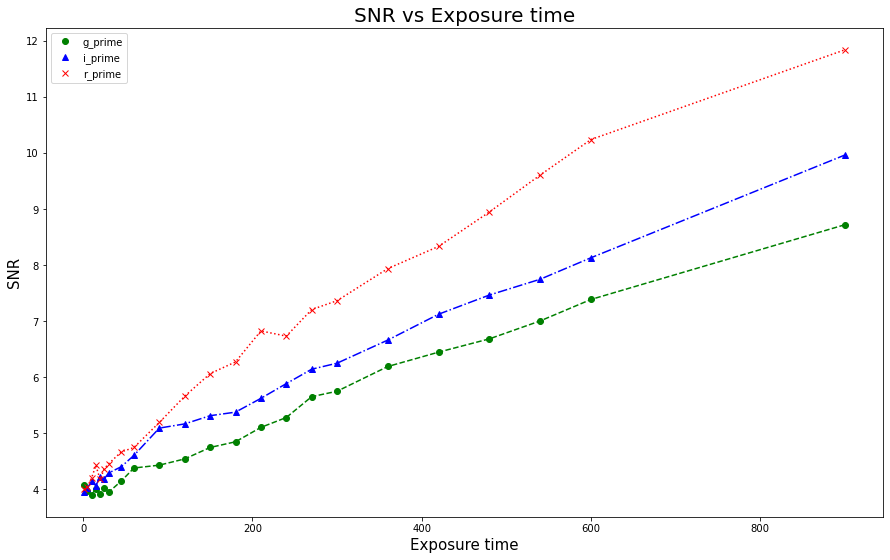

In [129]:
plt.figure(figsize = (15,9))
exposure_time = data["star1"]["exposure_time"]
plt.plot(exposure_time, SNR_dict["star1"], 'go', label='g_prime')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='i_prime')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'rx', label='r_prime')
plt.plot(exposure_time, SNR_dict["star3"], 'r:')
# plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
# plt.plot(exposure_time, SNR, 'r-')
plt.title('SNR vs Exposure time', fontsize=20)
plt.xlabel('Exposure time', fontsize=15)
plt.ylabel('SNR', fontsize=15)
plt.legend()

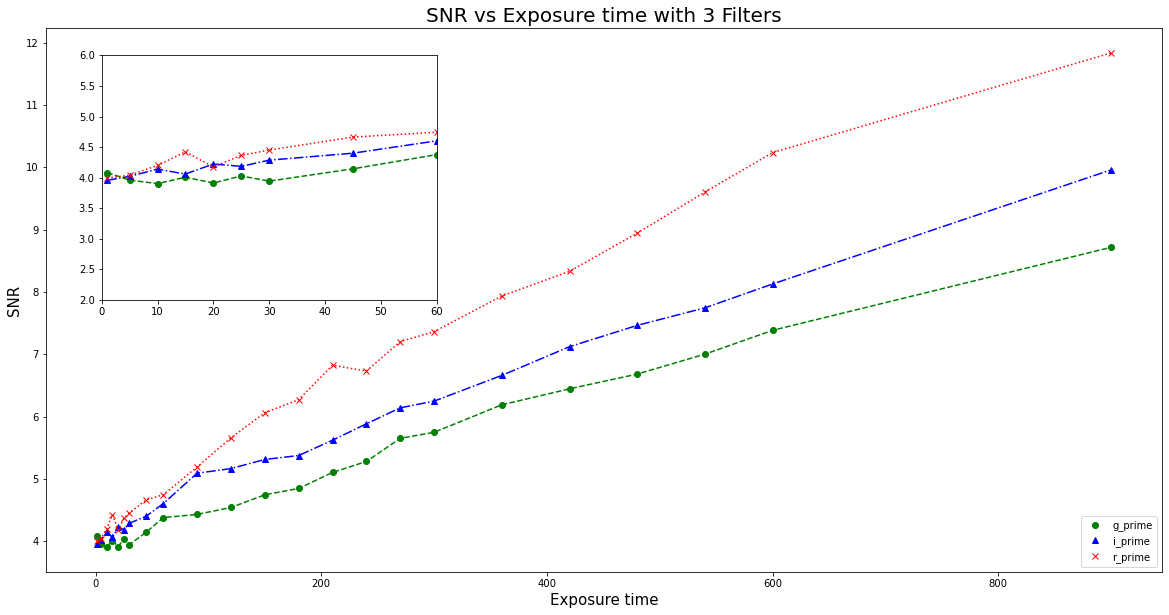

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(exposure_time, SNR_dict["star1"], 'go', label='g_prime')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='i_prime')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'rx', label='r_prime')
plt.plot(exposure_time, SNR_dict["star3"], 'r:')
# plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
# plt.plot(exposure_time, SNR, 'r-')
ax1.set_title('SNR vs Exposure time with 3 Filters', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR',fontsize=15)
ax1.legend(loc=4)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,0,0])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.05,0.5,0.3,0.45])
ax2.set_axes_locator(ip)


plt.plot(exposure_time, SNR_dict["star1"], 'go', label='SNR_Star1')
plt.plot(exposure_time, SNR_dict["star1"], 'g--')
plt.plot(exposure_time, SNR_dict["star2"], 'b^', label='SNR_Star2')
plt.plot(exposure_time, SNR_dict["star2"], 'b-.')
plt.plot(exposure_time, SNR_dict["star3"], 'rx', label='SNR_Star3')
plt.plot(exposure_time, SNR_dict["star3"], 'r:')
# plt.plot(exposure_time, SNR, 'r*', label='SNR_average')
# plt.plot(exposure_time, SNR, 'r-')
ax2.set_xlim(0,60)
ax2.set_ylim(2,6)
plt.savefig('snr_expt_filters.png')
plt.show()